In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/ADS_505/Module_3/LD2011_2014.csv"
data = pd.read_csv(path)

<ipython-input-3-b7512bbfdc46>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [ ]:
data.columns

Index(['Unnamed: 0', 'MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005',
       'MT_006', 'MT_007', 'MT_008', 'MT_009',
       ...
       'MT_361', 'MT_362', 'MT_363', 'MT_364', 'MT_365', 'MT_366', 'MT_367',
       'MT_368', 'MT_369', 'MT_370'],
      dtype='object', length=371)

In [ ]:
# rename the first column for clarity
data.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace= True)

# Convert the timestamp column to a datetime object for easier analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Identifying non-numeric columns
non_numeric_columns = data.select_dtypes(include=["object"]).columns

# Convert string values with commas as decimal separators to floats
for col in non_numeric_columns:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Now, convert kW to kWh by dividing all values by 4
data.iloc[:, 1:] = data.iloc[:, 1:] / 4

data.dtypes



Timestamp    datetime64[ns]
MT_001              float64
MT_002              float64
MT_003              float64
MT_004              float64
                  ...      
MT_366              float64
MT_367              float64
MT_368              float64
MT_369              float64
MT_370              float64
Length: 371, dtype: object

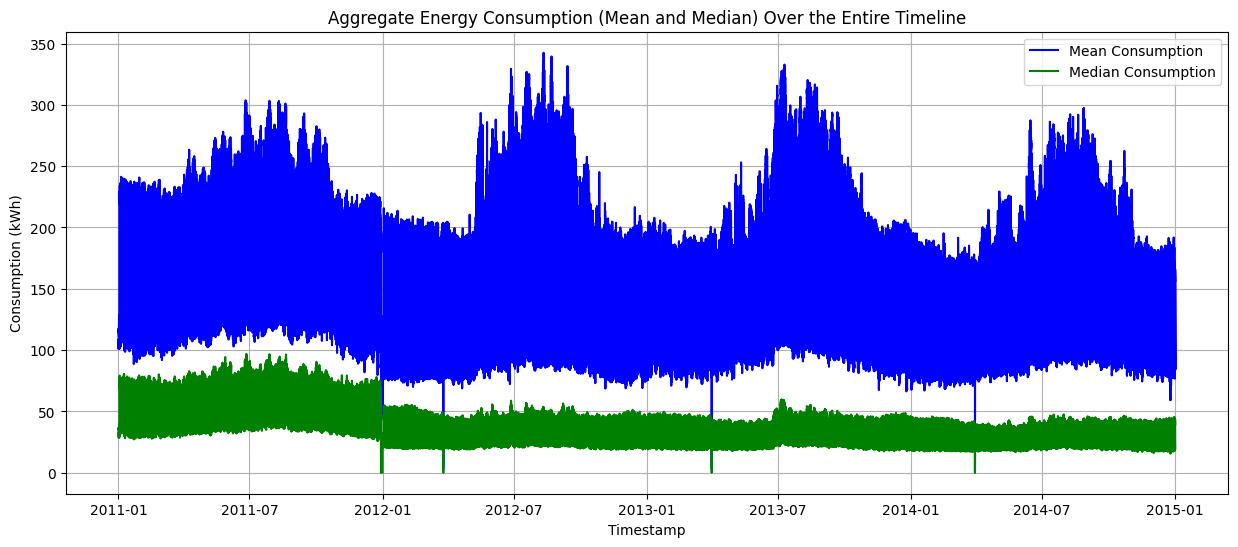

In [ ]:
# Calculate the mean and median consumption across all clients
data['Mean Consumption'] = data.iloc[:, 1:371].mean(axis=1)
data['Median Consumption'] = data.iloc[:, 1:371].median(axis=1)

# Plotting the aggregate data
plt.figure(figsize=(15, 6))
plt.plot(data['Timestamp'], data['Mean Consumption'], label='Mean Consumption', color='blue')
plt.plot(data['Timestamp'], data['Median Consumption'], label='Median Consumption', color='green')

plt.title('Aggregate Energy Consumption (Mean and Median) Over the Entire Timeline')
plt.xlabel('Timestamp')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()